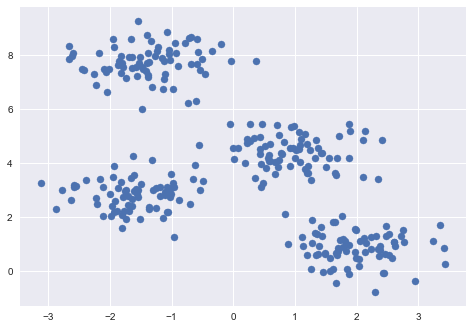

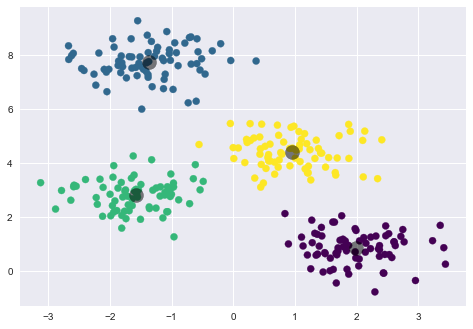

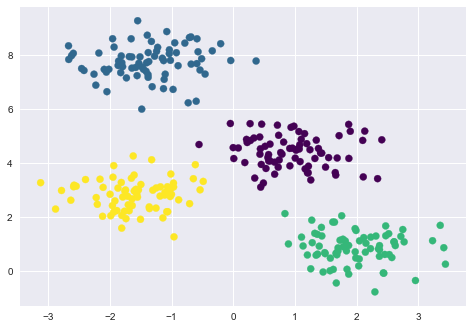

In [11]:
# Simple example using Sklearn
# generate a two-dimensional dataset containing four distinct blobs.

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()
# By eye, it is relatively easy to pick out the four clusters. 
# The k-means algorithm does this automatically, and in Scikit-Learn uses the standard estimator API:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
# from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

#visualize the results by plotting the data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.show()

AxesImage(72,115.953;76.9655x74.1273)
AxesImage(164.359,115.953;76.9655x74.1273)
AxesImage(256.717,115.953;76.9655x74.1273)
AxesImage(349.076,115.953;76.9655x74.1273)
AxesImage(441.434,115.953;76.9655x74.1273)
AxesImage(72,27;76.9655x74.1273)
AxesImage(164.359,27;76.9655x74.1273)
AxesImage(256.717,27;76.9655x74.1273)
AxesImage(349.076,27;76.9655x74.1273)
AxesImage(441.434,27;76.9655x74.1273)


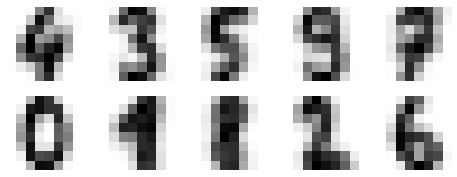

0.7935447968836951


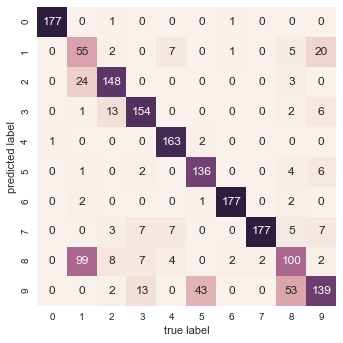

In [26]:
# K-Means Algorithm on Digits using Sklearn
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
import matplotlib.pyplot as plt
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    
    print(axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary))
plt.show(axi)
#  even without the labels, KMeans can find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.
#  fix this by matching each learned cluster label with the correct names found in them:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# accuracy_score
from sklearn.metrics import accuracy_score
print(accuracy_score(digits.target, labels)    )

# Let’s check the confusion matrix for this:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()